<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   packet_size            1000 non-null   float64
 1   inter_arrival_time     1000 non-null   float64
 2   src_port               1000 non-null   int64  
 3   dst_port               1000 non-null   int64  
 4   packet_count_5s        1000 non-null   float64
 5   mean_packet_size       1000 non-null   float64
 6   spectral_entropy       1000 non-null   float64
 7   frequency_band_energy  1000 non-null   float64
 8   label                  1000 non-null   float64
 9   protocol_type_TCP      1000 non-null   bool   
 10  protocol_type_UDP      1000 non-null   bool   
 11  src_ip_192.168.1.2     1000 non-null   bool   
 12  src_ip_192.168.1.3     1000 non-null   bool   
 13  dst_ip_192.168.1.5     1000 non-null   bool   
 14  dst_ip_192.168.1.6     1000 non-null   bool   
 15  tcp_f

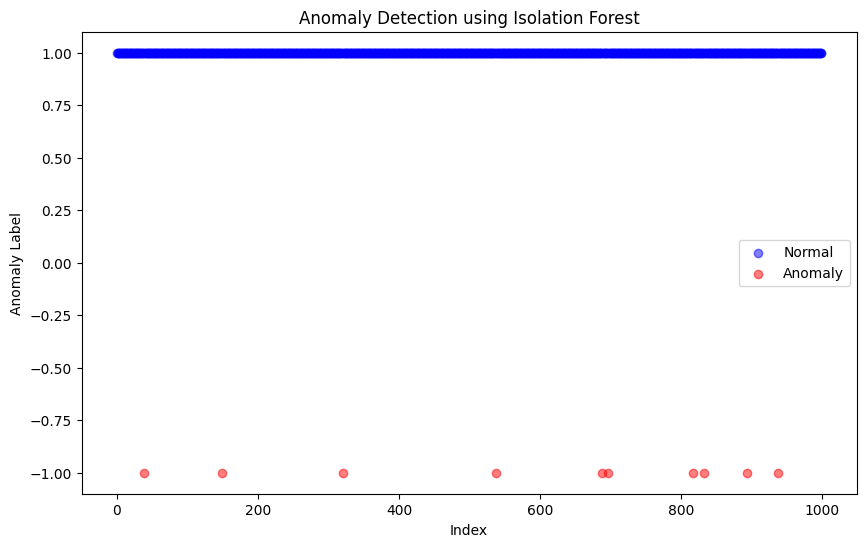

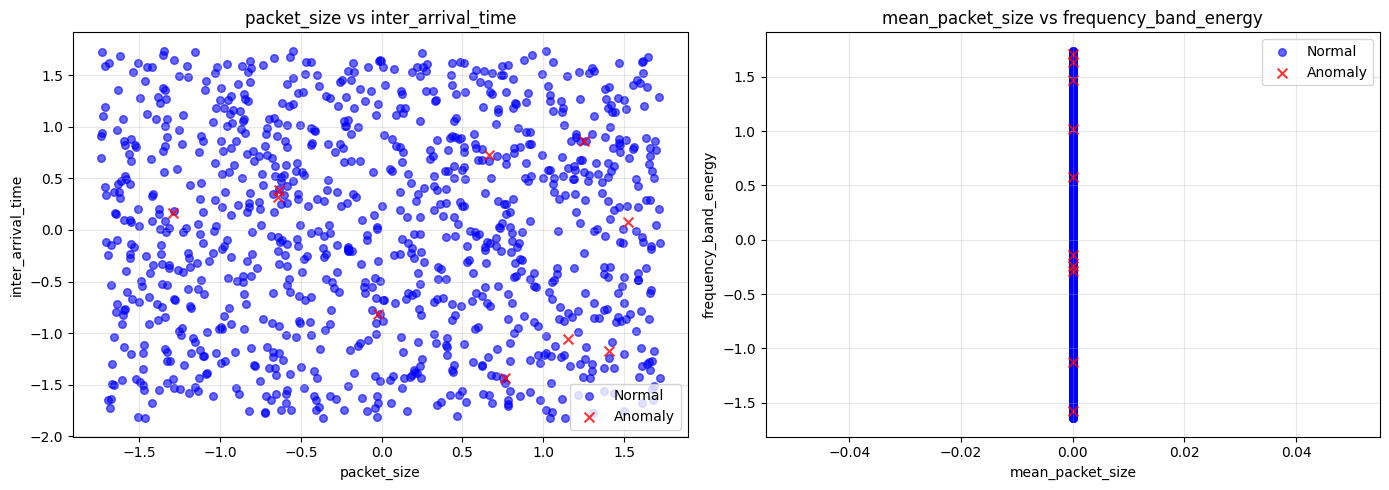

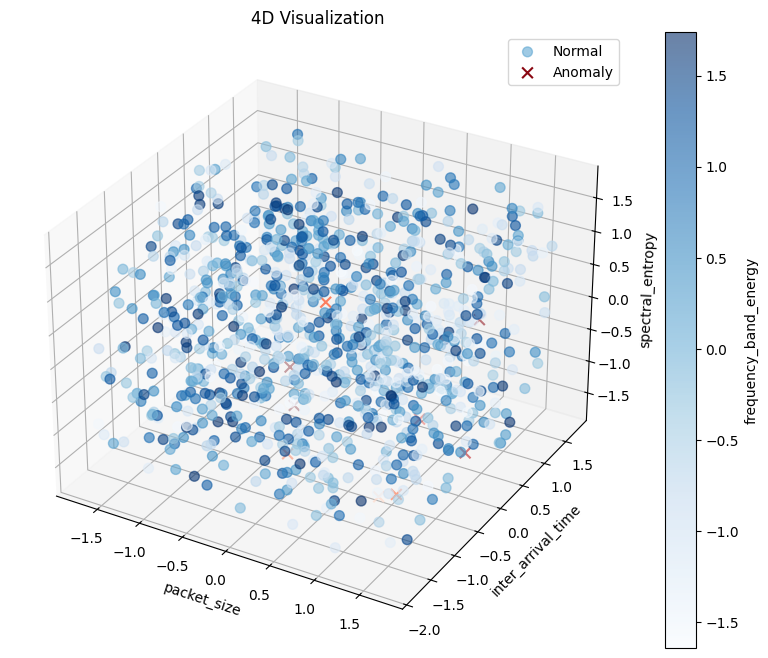

In [21]:
# import required libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.ensemble import IsolationForest
from ucimlrepo import fetch_ucirepo
df = pd.read_csv('Embedded_system.csv')
df.head()
df.isna().sum()
df.info()
# scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df)
df = pd.DataFrame(scaled_features, columns=df.columns)
df.head()
# parameters for isolation tree
n_estimators = 100    # number of trees in forest
contamination = 0.01  # proportion of outliers in the data
sample_size = 256     # number of samples to draw from the data to train each tree

# train the isolation forest model
model = IsolationForest(n_estimators=n_estimators, contamination=contamination, 
                        max_samples = sample_size, random_state=42)
model.fit(df)

# predict anomalies
anomaly_labels = model.predict(df)
# -1 for anomalies , 1 for normal instances
anomaly_labels
# create new column in original dataframe to store anomaly labels
df['anomaly'] = anomaly_labels
df.head()
# check value counts of anomaly labels
df['anomaly'].value_counts()
# visualize anomalies using scatter plot
plt.figure(figsize=(10,6))
normal_data = df[df['anomaly'] == 1]
plt.scatter(normal_data.index, normal_data['anomaly'], color='blue', label="Normal", alpha = 0.5)

# plot anomalies 
anomalies = df[df['anomaly'] == -1]
plt.scatter(anomalies.index, anomalies['anomaly'], color='red', label='Anomaly', alpha=0.5)
plt.title('Anomaly Detection using Isolation Forest')
plt.xlabel('Index')
plt.ylabel('Anomaly Label')
plt.legend()
plt.show()

# Visualize anomalies - Multiple feature comparisons
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

normal = df[df['anomaly' ] == 1]
anomaly = df[df['anomaly' ] == -1]

# Plot 1: CO vs C6H6
axes[0].scatter(normal['packet_size'], normal['inter_arrival_time'], color='blue', label='Normal', alpha=0.6, s=30)
axes[0].scatter(anomaly['packet_size'], anomaly['inter_arrival_time'], color='red', label='Anomaly', alpha=0.8, s=50, marker='x')
axes[0].set_xlabel('packet_size')
axes[0].set_ylabel('inter_arrival_time')
axes[0].set_title('packet_size vs inter_arrival_time')
axes [0].legend()
axes[0].grid(True, alpha=0.3)

# Plot 2: NOx vs NO2
axes[1].scatter(normal['mean_packet_size'], normal['frequency_band_energy'], color='blue', label='Normal', alpha=0.6, s=30)
axes[1].scatter(anomaly['mean_packet_size'], anomaly['frequency_band_energy'], color='red', label='Anomaly', alpha=0.8, s=50, marker='x')
axes[1].set_xlabel('mean_packet_size')
axes[1].set_ylabel('frequency_band_energy')
axes[1].set_title('mean_packet_size vs frequency_band_energy')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

normal = df[df['anomaly'] == 1]
anomaly = df[df['anomaly'] == -1]

# Normal points
scatter = ax.scatter(
    normal['packet_size'],
    normal['inter_arrival_time'],
    normal['spectral_entropy'],
    c=normal['frequency_band_energy'],   # 4th dimension
    cmap='Blues',
    alpha=0.6,
    s=50,
    label='Normal'
)

# Anomaly points
ax.scatter(
    anomaly['packet_size'],
    anomaly['inter_arrival_time'],
    anomaly['spectral_entropy'],
    c=anomaly['frequency_band_energy'],
    cmap='Reds',
    marker='x',
    s=60,
    label='Anomaly'
)

ax.set_xlabel('packet_size')
ax.set_ylabel('inter_arrival_time')
ax.set_zlabel('spectral_entropy')

fig.colorbar(scatter, ax=ax, label='frequency_band_energy')

ax.set_title("4D Visualization")
ax.legend()

plt.show()

import plotly.graph_objects as go
import numpy as np
 
# Separate normal and anomaly
normal = df[df['anomaly'] == 1]
anomaly = df[df['anomaly'] == -1]
 
fig = go.Figure()
 
# Normal points
fig.add_trace(go.Scatter3d(
    x=normal['packet_size'],
    y=normal['inter_arrival_time'],
    z=normal['spectral_entropy'],
    mode='markers',
    name='Normal',
    marker=dict(
        size=6,
        color=normal['frequency_band_energy'],   # 4th dimension as color
        colorscale='Blues',
        opacity=0.6,
        colorbar=dict(title='frequency_band_energy')
    )
))
 
# Anomaly points
fig.add_trace(go.Scatter3d(
    x=anomaly['packet_size'],
    y=anomaly['inter_arrival_time'],
    z=anomaly['spectral_entropy'],
    mode='markers',
    name='Anomaly',
    marker=dict(
        size=8,
        color=anomaly['frequency_band_energy'],
        colorscale='Reds',
        opacity=0.9,
        symbol='diamond'
    )
))
 
# Layout
fig.update_layout(
    title='4D Scatter Plot (Color = frequency_band_energy)',
    scene=dict(
        xaxis_title='packet_size',
        yaxis_title='inter_arrival_time',
        zaxis_title='spectral_entropy'
    ),
    width=900,
    height=700
)
 
fig.show()